<a href="https://colab.research.google.com/github/ranitnathRN8/FinalYearProject/blob/main/FinalYearProject_ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
# Install Kaggle library
!pip install -q kaggle

In [3]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:23<00:00, 34.5MB/s]
100% 2.04G/2.04G [00:23<00:00, 91.3MB/s]


In [7]:
!mkdir train

In [8]:
!unzip plantvillage-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: train/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce7

In [9]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback

# Imports for diverse utilities
from shutil import copyfile
import matplotlib.pyplot as plt
import operator
from PIL import Image
from sys import intern   # For the symbol definitions

Loading and Preprocessing Data

In [10]:

# Data Argumentation
tfms = get_transforms(flip_vert=True)


In [11]:
# Loading & Preprocessing Data
data = ImageDataBunch.from_folder("/content/train/plantvillage dataset", train="color", valid_pct=0.1, size=256, bs=100)

In [12]:
data

ImageDataBunch;

Train: LabelList (146625 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch
Path: /content/train/plantvillage dataset;

Valid: LabelList (16291 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Apple___healthy,Orange___Haunglongbing_(Citrus_greening),Tomato___Late_blight,Peach___healthy,Tomato___Spider_mites Two-spotted_spider_mite
Path: /content/train/plantvillage dataset;

Test: None

In [13]:
data.batch_stats()

[tensor([0.3588, 0.3898, 0.3309]), tensor([0.2423, 0.2438, 0.2428])]

In [14]:
# Normalising Data 
data.normalize()

ImageDataBunch;

Train: LabelList (146625 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch
Path: /content/train/plantvillage dataset;

Valid: LabelList (16291 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Apple___healthy,Orange___Haunglongbing_(Citrus_greening),Tomato___Late_blight,Peach___healthy,Tomato___Spider_mites Two-spotted_spider_mite
Path: /content/train/plantvillage dataset;

Test: None

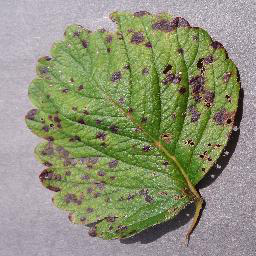

In [15]:
# Showing a sample image
data.open(data.items[10])

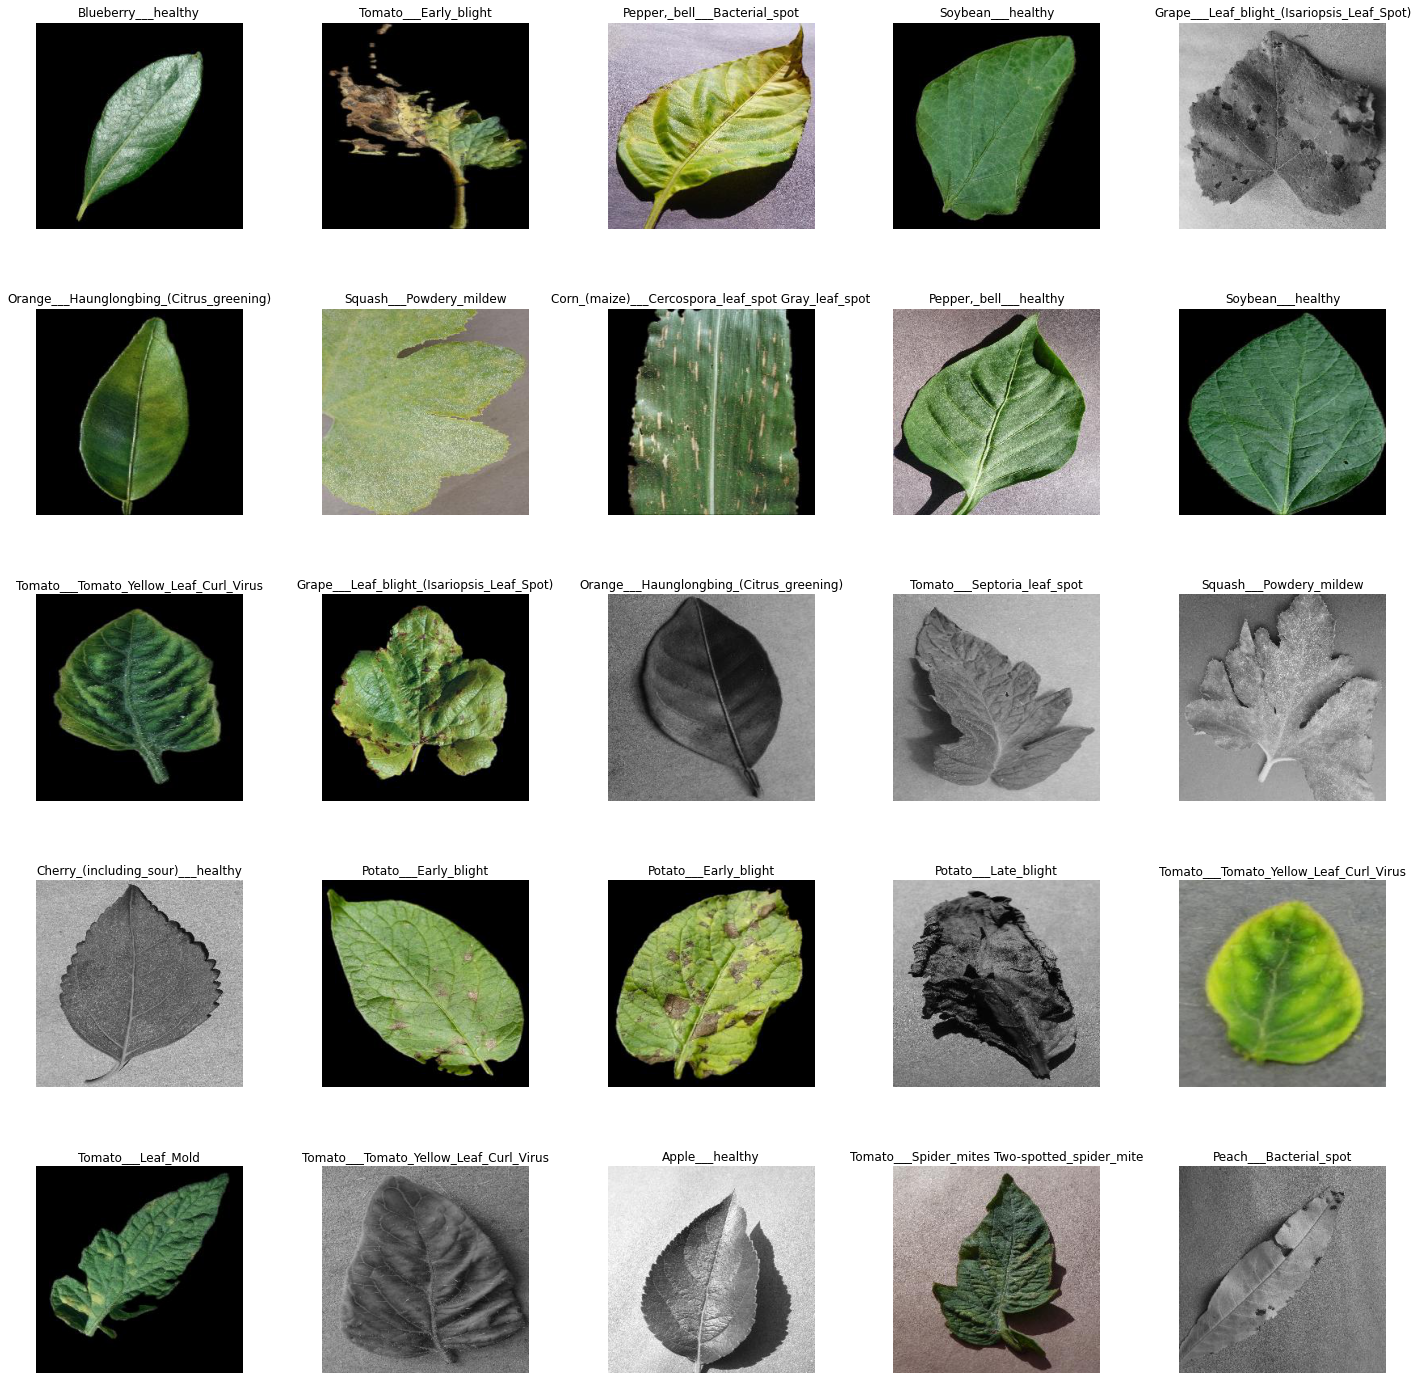

In [16]:
# Showing a batch of images with corresponding labels
data.show_batch()

Making the Model

In [17]:
# Using ResNet18 model 
learn = cnn_learner(data, models.resnet18, metrics = [accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [18]:
learn.data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [19]:
# The Model Architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Training The Model

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.277474,0.162597,0.946903,0.053097,08:51


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.277474,0.162597,0.946903,0.053097,08:51
1,0.154955,0.085086,0.972439,0.027561,08:49
2,0.095906,0.056778,0.981032,0.018968,08:51
3,0.068586,0.047690,0.985145,0.014855,08:51


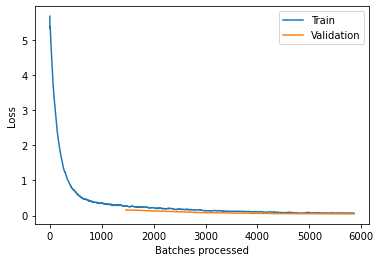

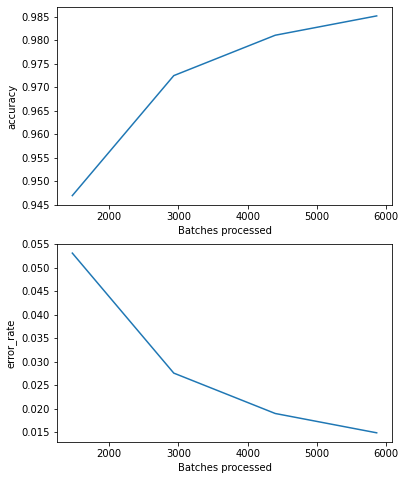

In [20]:
# Training model for 5 epoch
learn.fit_one_cycle(4, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='plant-1')])
learn.recorder.plot_losses()
learn.recorder.plot_metrics()
# Save the network (need to regenerate the databunch if we continue)
learn.save('plant-stage-1')
#learn.fit(5)

In [21]:
# Load the Model
learn.load('plant-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (146625 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch,Strawberry___Leaf_scorch
Path: /content/train/plantvillage dataset;

Valid: LabelList (16291 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Apple___healthy,Orange___Haunglongbing_(Citrus_greening),Tomato___Late_blight,Peach___healthy,Tomato___Spider_mites Two-spotted_spider_mite
Path: /content/train/plantvillage dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, 

Results for ResNet18


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [ ]:
# Looking at the worst results

interp.plot_top_losses(9, figsize=(20,11), heatmap=False)

In [ ]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=True)

Hyperparameter Tuning

In [25]:
# Finding the best learning rate to increate overall accuracy

# Unfreeze all layers of the CNN
#learn.unfreeze()# Find the optimal learning rate and plot a visual
#learn.lr_find()
#learn.recorder.plot(suggestion=True)

In [26]:
# Fit the model over 2 epochs
#learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 5.75E-07


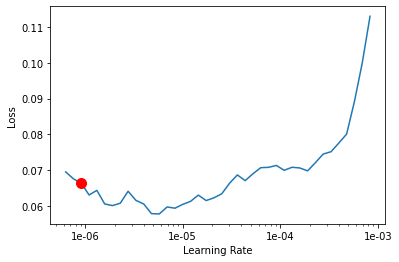

In [27]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Unfreeze the network
#learn.unfreeze()
#learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-6),callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='plant-1')])
#learn.recorder.plot_losses()
#learn.recorder.plot_metrics()
# Save the network (need to regenerate the databunch if we continue)
#learn.save('plant-stage-2')

In [ ]:
#learn.load('plant-stage-1')
# Unfreeze the network
#learn.unfreeze()
#learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-6),callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='plant-1')])
#learn.recorder.plot_losses()
#learn.recorder.plot_metrics()
# Save the network (need to regenerate the databunch if we continue)
#learn.save('plant-stage-3')

In [ ]:
learn.load('plant-stage-1')
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

Getting Results

In [ ]:
# Showing the results for training dta

learn.show_results(ds_type = DatasetType.Train)

In [ ]:
# Showing the results for validation data

learn.show_results(ds_type=DatasetType.Valid)

In [ ]:
#learn.predict(open_image("/content/rot_black_frogeye.jpg"))

In [ ]:
#learn.recorder.plot()

In [ ]:
#learn.recorder.plot(suggestion=True)
#mng3 = learn.recorder.min_grad_lr

In [ ]:
# Plotting loss 

#learn.recorder.plot_losses()

In [ ]:
# Plotting Accuracy 

# learn.recorder.plot_metrics()

In [ ]:
# Getting the confusing matrix

preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.confusion_matrix()

In [ ]:
# Seeing in which class model get the most confused
interp.most_confused()

Exporting the Model

In [ ]:
# Saving the trained model

learn.export(file = Path("/content/export.pkl"))